***
## DA 320 

#### Assignment: Practical Dashboards 
#### Student: Natalia Sadkov 
#### Source: base of code provided by Professor Spence - https://github.com/tspence/data-analysis-class-resources/blob/main/jupyter/Basics%20of%20Loading%20Data.ipynb
#### charts code addopted from https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/#20.-Histogram-for-Continuous-Variable by Selva Prabhakaran
##### Date: November, 2 2022

***


In [71]:
#!/usr/bin/python
#import libraries
import urllib3
import certifi
import json
import pymongo
import certifi
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
from matplotlib import pyplot

***
### Retrieve connection from a JSON file 
***

In [72]:

# Loading creditionals for connection with server
with open('/Users/natasha/Desktop/Fall 2022/DA320/Password MongoDB/credentials.json') as f:
    data = json.load(f)
secret_key = data['mongodb']


***
### Connect to a MongoDB Server to DA-320 database and check collections
***

In [73]:

# Connect to the database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())

# Fetch the database named "DA-320"
da320_database = client['DA-320']

# access to collections
allCollections = da320_database.list_collection_names()

# output the collections within my database
print(f"Using MongoDB version {client.server_info()['version']}.")
print(f"This database has the collections {allCollections}")

Using MongoDB version 5.0.13.
This database has the collections ['Metacritics', 'imdb', 'in class demo view', 'HW-practical dashboards-year', 'HW-practical dashboards']


***
### Fetch HW-practical dashboards collection from a MongoDB Server
***

In [74]:
#creating cursore
cursor = da320_database["HW-practical dashboards-year"].find()

# convert this information into a Pandas dataframe
pr_dash = pd.DataFrame(cursor)

# check information
pr_dash.head()

,_id,id,title,runtime,user_rating,voites,budget,opening_weekend,gross_sales,genres,casts,directors,producers,companies,release_date,mpaa_rating,release_date_for_year_fetch,rating,release_year
0,634b797036c53874680c5c86,78492,The Wild Geese,134.0,6.7,None,10000000.0,None,NaN,"[Action, Adventure, Drama, Thriller, War]","[Richard Burton, Roger Moore, Richard Harris, ...",[Andrew V. McLaglen],"[Chris Chrisafis, Erwin C. Dietrich, Euan Lloy...","[Euan Lloyd Productions, Richmond Film Product...",1978-06-28,[R],"[6, 28, 1978]",R,1978
1,634b797036c53874680c5c6a,78111,Pretty Baby,110.0,6.5,None,NaN,None,NaN,[Drama],"[Brooke Shields, Keith Carradine, Susan Sarand...",[Louis Malle],"[Louis Malle, Polly Platt]",[Paramount Pictures],1978-01-01,[TV-MA],"[1, 1, 1978]",TV-MA,1978
2,634b797036c53874680c5c62,78346,Superman,143.0,7.4,None,55000000.0,None,166200000.0,"[Action, Adventure, Sci-Fi]","[Marlon Brando, Gene Hackman, Christopher Reev...",[Richard Donner],"[Charles Greenlaw, Richard Lester, Alexander S...","[Dovemead Films, Film Export A.G., Internation...",1978-12-10,"[TV-PG, (LV)]","[12, 10, 1978]",TV-PG,1978
3,634b797036c53874680c5c67,77413,Death on the Nile,140.0,7.2,None,7920000.0,None,784489.0,"[Crime, Drama, Mystery]","[Peter Ustinov, Jane Birkin, Lois Chiles, Bett...",[John Guillermin],"[John Brabourne, Richard Goodwin, Norton Knatc...","[Mersham Productions Ltd., EMI Films]",1978-06-20,[PG],"[6, 20, 1978]",PG,1978
4,634b797036c53874680c5c63,77416,The Deer Hunter,183.0,8.1,None,15000000.0,None,NaN,"[Drama, War]","[Robert De Niro, John Cazale, John Savage, Chr...",[Michael Cimino],"[Joann Carelli, Michael Cimino, Michael Deeley...","[EMI Films, Universal Pictures]",1978-12-08,[R],"[12, 8, 1978]",R,1978


***
### Single genre(Drama) of movies over time
***

In [75]:
# creating cursor fot drama genre
cursor = da320_database["HW-practical dashboards-year"].find({"genres":{"$in": ["Drama"] }})
drama_films = pd.DataFrame(cursor)


In [76]:
# made visualy nice currency format
def format_currency(amount, _):
    if amount > 1_000_000_000_000:
        return f"${round(amount / 1_000_000_000_000)}T"
    elif amount > 1_000_000_000:
        return f"${round(amount / 1_000_000_000)}B"
    elif amount > 1_000_000:
        return f"${round(amount / 1_000_000)}M"
    elif amount > 1_000:
        return f"${round(amount / 1_000)}K"
    else:
        return f"${round(amount)}"

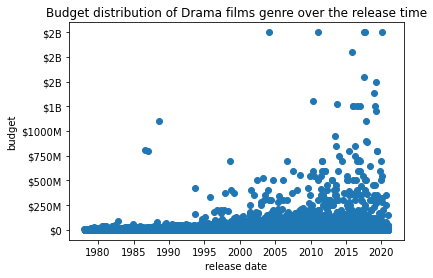

In [77]:
#scatter plot of Budget distribution of Drama films genre over the release time
plt.title('Budget distribution of Drama films genre over the release time')
plt.scatter(drama_films['release_date'], drama_films['budget'])
plt.xlabel('release date')
plt.ylabel('budget')
plt.gca().yaxis.set_major_formatter(format_currency)
plt.show()

##### Findings: Dramma mobvies with higher budget was released after 2005

***
### Movies released within a single year (2012)
***

In [78]:
#reating cursor for year (2012)
cursor = da320_database["HW-practical dashboards-year"].find({"release_year":{"$in": ["2012"] }})
year_films = pd.DataFrame(cursor)


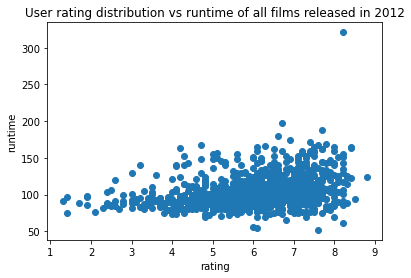

In [79]:
#scatter plot of user rating distribution vs runtime of all films realeased in 2012
plt.title('User rating distribution vs runtime of all films released in 2012')
plt.scatter(year_films['user_rating'], year_films['runtime'])
plt.xlabel('rating')
plt.ylabel('runtime')
plt.show()

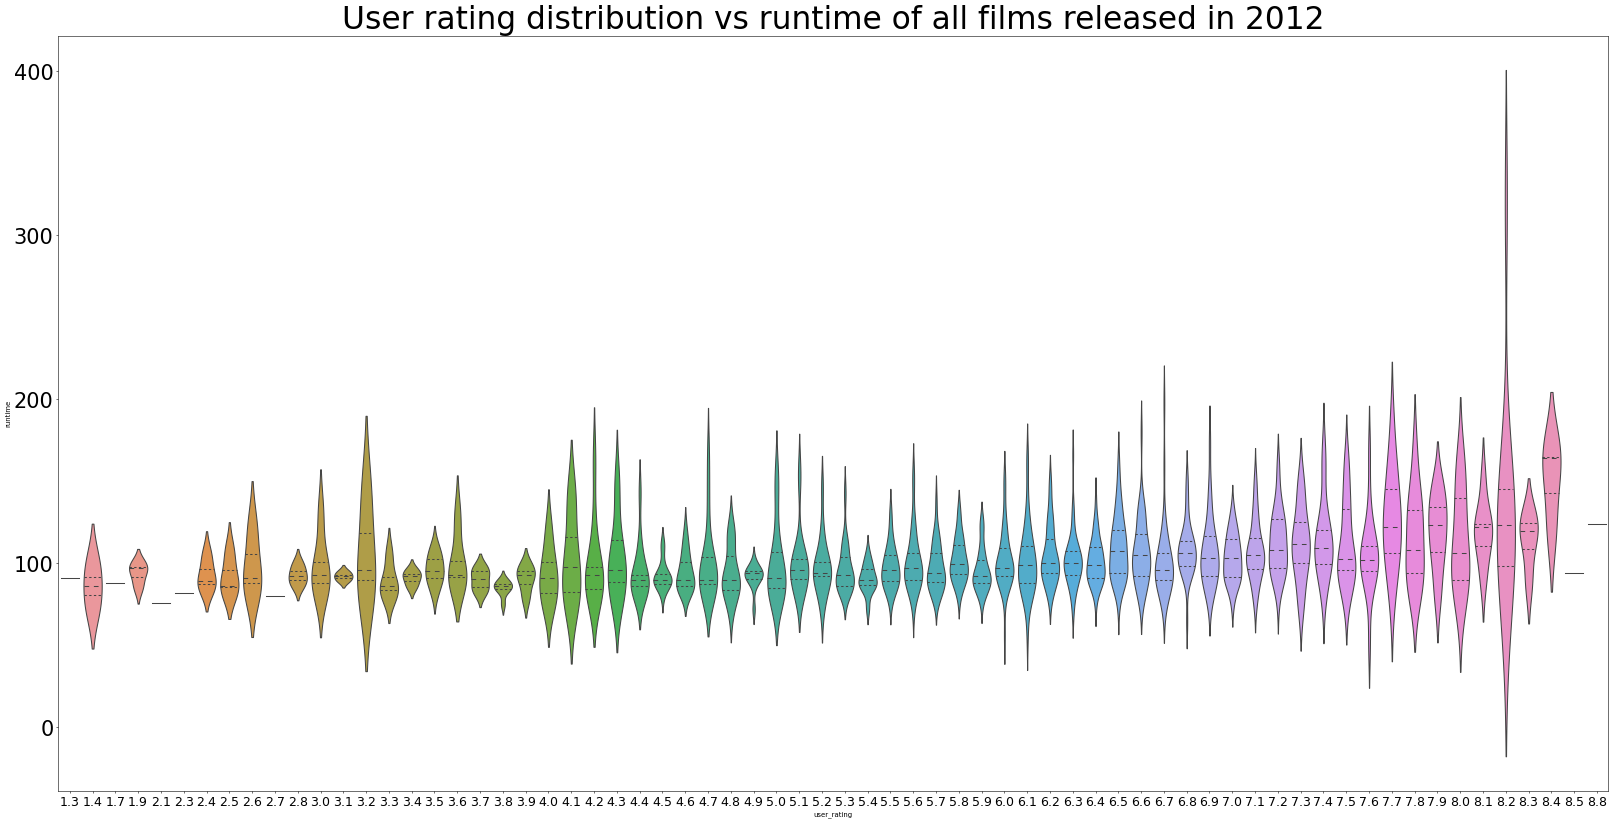

In [80]:
# violinplot for user rating distribution vs runtime of all films realeased in 2012
plt.figure(figsize=(40,20), dpi=50)
sns.violinplot(x='user_rating', y='runtime',  data=year_films, scale='width', inner='quartile', lablesize = 60)
# Decoration
#plt.gca().yaxis.set_major_formatter(format_currency)
plt.title('User rating distribution vs runtime of all films released in 2012', fontsize=45)
plt.xticks(fontsize=18)
plt.yticks(fontsize=30)
plt.show()
#still looking for label frontsize

#### Findings: On violinplot near 8.2 user raiting we see significant variability of runtime, and on scatter plot we can assume is outlier(or not), we will check it

In [81]:
#cheking: and I find that it is - Gangs of Wasseypur - Indian movie with runtime 5 hours 21 minutes(found it on IMdb ) - not a outlier
year_films.sort_values("runtime", ascending = False).head()

,_id,id,title,runtime,user_rating,voites,budget,opening_weekend,gross_sales,genres,casts,directors,producers,companies,release_date,mpaa_rating,release_date_for_year_fetch,rating,release_year
70,634b797936c53874680ca0a1,1954470,Gangs of Wasseypur,321,8.2,None,184000000.0,None,NaN,"[Action, Comedy, Crime, Drama, Thriller]","[Manoj Bajpayee, Richa Chadha, Nawazuddin Sidd...",[Anurag Kashyap],"[Apoorva Bakshi, Rakesh Bhagwani, Sunil Bohra,...","[Jar Pictures, AKFPL, Bohra Bros Productions, ...",2012-05-22,[Not Rated],"[5, 22, 2012]",Not Rated,2012
81,634b797936c53874680ca16b,2176013,Jab Tak Hai Jaan,198,6.7,None,7217600.0,None,2.652468e+07,"[Drama, Romance]","[Shah Rukh Khan, Anupam Kher, Katrina Kaif, An...",[Yash Chopra],"[Padam Bhushan, Aditya Chopra, Ajeet Ghorpade,...","[First Step Productions, Redchillies.VFX, Yash...",2012-11-13,[Not Rated],"[11, 13, 2012]",Not Rated,2012
325,634b797936c53874680ca266,2180477,Nanban,188,7.7,None,600000000.0,None,1.680000e+09,"[Comedy, Drama]","[Thalapathy Vijay, Jiiva, Srikanth, Ileana D'C...",[S. Shankar],"[Darshan Dayal, Raju Easwaran, Rengarajan Jaip...",[Gemini Film Circuit],2012-01-12,[Not Rated],"[1, 12, 2012]",Not Rated,2012
1121,634b797a36c53874680ca47b,2357208,Run Baby Run,180,6.6,None,NaN,None,NaN,"[Action, Comedy, Thriller]","[Mohanlal, Amala Paul, Biju Menon, Saikumar, S...",[Joshiy],"[Milan Jaleel, Syed Nizamuddin]",[Galaxy Films],2012-08-29,[NULL],"[8, 29, 2012]",NULL,2012
344,634b797936c53874680ca18b,1849718,Agneepath,174,6.9,None,600000000.0,None,NaN,"[Action, Crime, Drama]","[Hrithik Roshan, Priyanka Chopra Jonas, Sanjay...",[Karan Malhotra],"[Sumeet Chawla, Hiroo Johar, Karan Johar, Pras...","[Dharma Productions, Live Forever Productions(...",2012-01-25,[Not Rated],"[1, 25, 2012]",Not Rated,2012


***
### Tracking career of producer (Frank Darabont)
***

In [82]:
#reating cursor for dirctor Frank Darabont
cursor = da320_database["HW-practical dashboards-year"].find({"directors":{"$in": ["Frank Darabont"] }})
director_darabont = pd.DataFrame(cursor)

director_darabont.head()

,_id,id,title,runtime,user_rating,voites,budget,opening_weekend,gross_sales,genres,casts,directors,producers,companies,release_date,mpaa_rating,release_date_for_year_fetch,rating,release_year
0,634b797336c53874680c6e92,111161,The Shawshank Redemption,142,9.3,None,25000000,None,58500000.0,[Drama],"[Tim Robbins, Morgan Freeman, Bob Gunton, Will...",[Frank Darabont],"[Liz Glotzer, David V. Lester, Niki Marvin]",[Castle Rock Entertainment],1994-09-10,"[TV-14, (DLSV)]","[9, 10, 1994]",TV-14,1994
1,634b797436c53874680c76fa,120689,The Green Mile,189,8.6,None,60000000,None,286801374.0,"[Crime, Drama, Fantasy, Mystery]","[Tom Hanks, David Morse, Bonnie Hunt, Michael ...",[Frank Darabont],"[Frank Darabont, David Valdes]","[Castle Rock Entertainment, Darkwoods Producti...",1999-12-06,"[TV-14, (LV, TV Rating.)]","[12, 6, 1999]",TV-14,1999
2,634b797436c53874680c7b9b,268995,The Majestic,152,6.9,None,72000000,None,NaN,"[Drama, Romance]","[Jim Carrey, Bob Balaban, Jeffrey DeMunn, Hal ...",[Frank Darabont],"[Jim Behnke, Claudia Cummings, Frank Darabont,...","[Castle Rock Entertainment, Village Roadshow P...",2001-12-11,"[PG, (No. 38697)]","[12, 11, 2001]",PG,2001
3,634b797736c53874680c8c92,884328,The Mist,126,7.1,None,18000000,None,57470220.0,"[Horror, Sci-Fi, Thriller]","[Thomas Jane, Marcia Gay Harden, Laurie Holden...",[Frank Darabont],"[Frank Darabont, Anna Garduno, Liz Glotzer, De...","[Dimension Films, Darkwoods Productions, The W...",2007-11-12,[TV-14],"[11, 12, 2007]",TV-14,2007


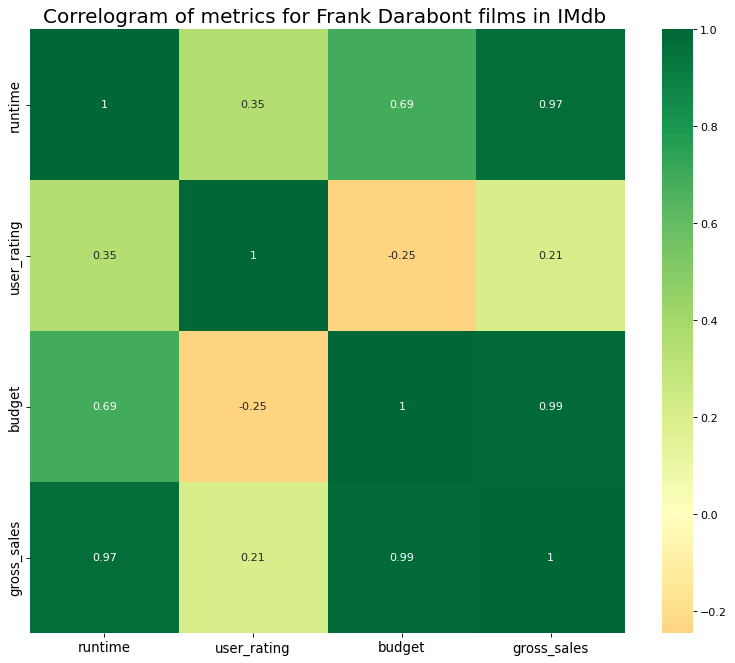

In [83]:
# Correlogram is used to visually see the correlation metric between all possible pairs of numeric variables 
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(director_darabont.corr(), xticklabels=director_darabont.corr().columns, yticklabels=director_darabont.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of metrics for Frank Darabont films in IMdb ', fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Findings: We can see strong positive correlation between gross_sals and runtime (that means increase runtime coresponds to increase in grass_sales for Darabont movies) and negative correlation between user_rating and budget (that means increase budget corresponds to decrease in user_rating decrease for Darabont movies)

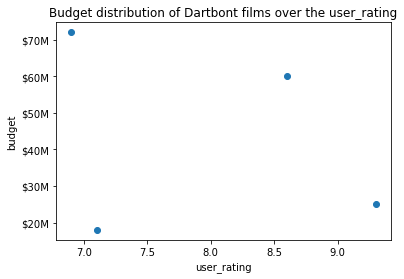

In [84]:
# I can also confirm my funding by using scatter plot
plt.title('Budget distribution of Dartbont films over the user_rating')
plt.scatter(director_darabont['user_rating'], director_darabont['budget'])
plt.xlabel('user_rating')
plt.ylabel('budget')
plt.gca().yaxis.set_major_formatter(format_currency)
plt.show()

***
### MongoDB Compass - Aggregations
***


/**
 Convert Runtime, User Rating, Votes, Budget, 
 Opening Weekend, and Gross Sales into numbers
 * &project stage
 */
 
{
    id:"$id",
    title:"$title",
    runtime:{
      $convert:{
      input: "$runtime",
      to: "int",
      onError: null,
    }
  },
    user_rating:{
      $convert:{
      input: "$user_rating",
      to: "double",
      onError: null,
    }
  },   
    voites:{
      $convert:{
      input: "$voites",
      to: "int",
      onError: null,
   }
  },
    budget:{
      $convert:{
      input: "$budget",
      to: "int",
      onError: null,
    }
  },
    opening_weekend:{
      $convert:{
      input: "$opening_wekend",
      to: "int",
      onError: null,
   }
 },
    gross_sales:{
      $convert:{
      input: "$gross_sales",
      to: "int",
      onError: null,
   }
 },
/*
 * Break apart the Genres, Cast, Director, 
 * Producer, and Company fields into arrays of names
 */
    genres:{
    $map:{
     input:{$split:["$genres", ","]},
     as :"mapped_data",
     in: {$trim:{input:"$$mapped_data"}}
    }
  },
    casts:{
    $map:{
     input:{$split:["$cast", ","]},
     as :"mapped_data",
     in: {$trim:{input:"$$mapped_data"}}
    }
  },
    directors:{
    $map:{
     input:{$split:["$director", ","]},
     as :"mapped_data",
     in: {$trim:{input:"$$mapped_data"}}
    }
  },
    
    producers:{
    $map:{
     input:{$split:["$producer", ","]},
     as :"mapped_data",
     in: {$trim:{input:"$$mapped_data"}}
    }
  },
    companies:{
    $map:{
     input:{$split:["$company", ","]},
     as :"mapped_data",
     in: {$trim:{input:"$$mapped_data"}}
    }
  },
   
  
  /**
 Convert the Release Date field into a date
 */
 
    release_date:{
      $convert:{
      input: "$release_date",
      to: "date",
      onError: null,
    }
  },
/*
 * Break apart the MPAA rating field into two fields: the rating, and ignore the DSLV descriptors
 */

   mpaa_rating:{
    $map:{
     input:{$split:["$mpaa_rating", "::"]},
     as :"mapped_data",
     in: {$trim:{input:"$$mapped_data"}}
    
    }
  },
  /**
 creating array from release date for fetching year in new field
 */
 release_date_for_year_fetch:{
    $map:{
     input:{$split:["$release_date", "/"]},
     as :"mapped_data",
     in: {$trim:{input:"$$mapped_data"}}
    
    }
 },
}

 /*
 * new stage -- $addFields - mpaa_rating
 */ 
{
  rating: {$arrayElemAt:["$mpaa_rating",0]}
}

/*
 * new stage -- $addFields- release-year
 */ 

 {
 release_year: {$arrayElemAt:["$release_date_for_year_fetch",2]}
}